# Descarga y descompresión ficheros

In [1]:
from urllib import urlretrieve
from datetime import datetime
import zipfile
import gzip
import glob
import os
import os.path
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Selecciono tres mercados de bitcoin de Coinbase (EUR, GBP y CAD) la selección en USD "petaba" el kernnel.
# Coinbase es una de las startups más populares del entorno de esta criptomoneda. 
#La startup Coinbase es responsable del monedero virtual de bitcoins más popular del mundo.
#Inaguró en 2015, el primer mercado regulado de intercambio, legal en la mitad de EEUU.

link = 'http://api.bitcoincharts.com/v1/csv/coinbaseEUR.csv.gz'
urlretrieve(link, "sample1.gz")

link = 'http://api.bitcoincharts.com/v1/csv/coinbaseCAD.csv.gz'
urlretrieve(link, "sample2.gz")

link = 'http://api.bitcoincharts.com/v1/csv/coinbaseGBP.csv.gz'
urlretrieve(link, "sample3.gz")

for gzip_path in glob.glob("*.gz"):
    if os.path.isdir(gzip_path) == False:
        inF = gzip.open(gzip_path, 'rb')
        s = inF.read()
        inF.close()
        
        gzip_fname = os.path.basename(gzip_path)
        
        fname = gzip_fname[:-3]
        uncompressed_path = os.path.join(os.getcwd(), fname)
        
        open(uncompressed_path, 'w').write(s)

# Indexación de cada uno de los dataframes 
Se tomarán los closing values

In [2]:
ts1 = pd.read_csv("sample1", names=['Date','PriceEUR', 'AmountEUR'])
ts1['Date'] = ts1['Date'].apply(lambda x: datetime.fromtimestamp(
        int(x)
    ).strftime('%Y-%m-%d') )
ts1_close = ts1.groupby('Date').last()
ts1_close.index = pd.to_datetime(ts1_close.index)

print("Tamaño primer fichero: ")
print(ts1_close.shape)

ts2 = pd.read_csv("sample2", names=['Date','PriceCAN', 'AmountCAN'])
ts2['Date'] = ts2['Date'].apply(lambda x: datetime.fromtimestamp(
        int(x)
    ).strftime('%Y-%m-%d') )
ts2_close = ts2.groupby('Date').last()
ts2_close.index = pd.to_datetime(ts2_close.index)

print("Tamaño segundo fichero: ")
print(ts2_close.shape)

ts3 = pd.read_csv("sample3", names=['Date','PriceGBP', 'AmountGBP'])
ts3['Date'] = ts3['Date'].apply(lambda x: datetime.fromtimestamp(
        int(x)
    ).strftime('%Y-%m-%d') )
ts3_close = ts3.groupby('Date').last()
ts3_close.index = pd.to_datetime(ts3_close.index)

print("Tamaño tercer fichero: ")
print(ts3_close.shape)

Tamaño primer fichero: 
(454, 2)
Tamaño segundo fichero: 
(326, 2)
Tamaño tercer fichero: 
(456, 2)


# Slicing  2015-2016  y procesamiento de los ficheros individuales

In [3]:
EUR15=ts1_close['2015-01-01':].sort_index()
print("Tamaño primer fichero: ")
print(EUR15.shape)
EUR15.head()

Tamaño primer fichero: 
(454, 2)


,PriceEUR,AmountEUR
Date,,
2015-04-23,200.00,0.0100
2015-04-24,220.00,0.0100
2015-04-27,205.34,0.0100
2015-04-28,204.48,0.0100
2015-04-29,204.13,0.2083


In [4]:
print "El precio máximo del Bitcoin denominado en EUR fue", EUR15["PriceEUR"].max(), ", en el día", EUR15["PriceEUR"].argmax()
print "El precio mínimo del Bitcoin denominado en EUR fue", EUR15["PriceEUR"].min(), ", en el día", EUR15["PriceEUR"].argmin()

El precio máximo del Bitcoin denominado en EUR fue 693.85 , en el día 2016-06-16 00:00:00
El precio mínimo del Bitcoin denominado en EUR fue 185.39 , en el día 2015-08-24 00:00:00


In [5]:
CAN15=ts2_close['2015-01-01':].sort_index()
print("Tamaño segundo fichero: ")
print(CAN15.shape)
CAN15.head()

Tamaño segundo fichero: 
(326, 2)


,PriceCAN,AmountCAN
Date,,
2015-08-31,303.46,0.020
2015-09-01,298.74,0.147
2015-09-02,303.42,1.640
2015-09-03,298.97,0.030
2015-09-04,303.93,0.410


In [6]:
print "El precio máximo del Bitcoin denominado en dolar canadiense fue", CAN15["PriceCAN"].max(),", en el día", CAN15["PriceCAN"].argmax()
print "El precio mínimo del Bitcoin denominado en dolar canadiense fue", CAN15["PriceCAN"].min(), ", en el día", CAN15["PriceCAN"].argmin()

El precio máximo del Bitcoin denominado en dolar canadiense fue 1011.1 , en el día 2016-06-16 00:00:00
El precio mínimo del Bitcoin denominado en dolar canadiense fue 298.74 , en el día 2015-09-01 00:00:00


In [7]:
GBP15=ts3_close['2015-01-01':].sort_index()
print("Tamaño tercer fichero: ")
print(GBP15.shape)
GBP15.head()

Tamaño tercer fichero: 
(456, 2)


,PriceGBP,AmountGBP
Date,,
2015-04-22,159.00,0.010000
2015-04-23,185.00,0.010000
2015-04-24,185.00,0.010000
2015-04-26,153.46,0.010000
2015-04-27,153.46,0.630011


In [8]:
print "El precio máximo del Bitcoin denominado en GBP fue", GBP15["PriceGBP"].max(), ", en el día", GBP15["PriceGBP"].argmax()
print "El precio mínimo del Bitcoin denominado en GBP fue", GBP15["PriceGBP"].min(), ", en el día", GBP15["PriceGBP"].argmin()

El precio máximo del Bitcoin denominado en GBP fue 549.45 , en el día 2016-06-16 00:00:00
El precio mínimo del Bitcoin denominado en GBP fue 136.22 , en el día 2015-08-24 00:00:00


Análisis gráfico de la volatilidad de las cotizaciones del bitcoin (CAN, EUR, GBP)

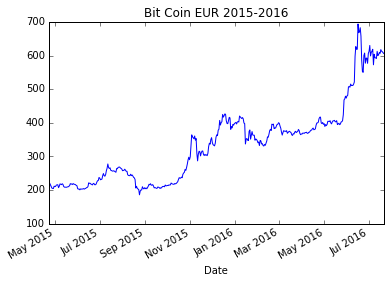

In [9]:
%matplotlib inline
EUR15.PriceEUR.plot(label="Bit Coin EUR")
plt.title ('Bit Coin EUR 2015-2016')
plt.show()

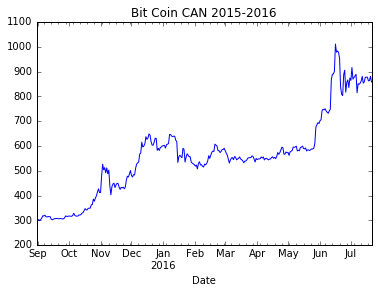

In [10]:
%matplotlib inline
CAN15.PriceCAN.plot(label="Bit Coin CAN")
plt.title ('Bit Coin CAN 2015-2016')
plt.show()

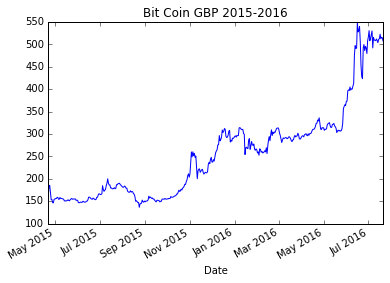

In [11]:
%matplotlib inline
GBP15.PriceGBP.plot(label="Bit Coin GBP")
plt.title ('Bit Coin GBP 2015-2016')
plt.show()

Se encuentra una excesiva volatilidad en los mercados de bitcoin, incluso en marcos temporales muy pequeños. En el año 2015, se superaron barreras como la de 400 €.
El Nobel de Economía Robert Shiller, analista y experto en la naturaleza de las burbujas, declaró, mostrarse totalmente convencido de que, en el vcaso del bitcoin, nos encontramos "totalmente" ante una burbuja (Foro de Davos 2014).

# Cálculo de medias móviles para cada uno de los mercados de cotización del Bitcoin (EUR, CAN, GBP)

In [82]:
#Para ver la construcción de Rolling Mean
Series.rolling?

In [12]:
EUR15RM=Series.rolling(EUR15.PriceEUR, min_periods=30, window=30).mean()
EUR15RM=EUR15RM.dropna()
EUR15RM.head()

Date
2015-05-24    211.720667
2015-05-25    212.259333
2015-05-26    212.216000
2015-05-27    212.606667
2015-05-28    213.004000
Name: PriceEUR, dtype: float64

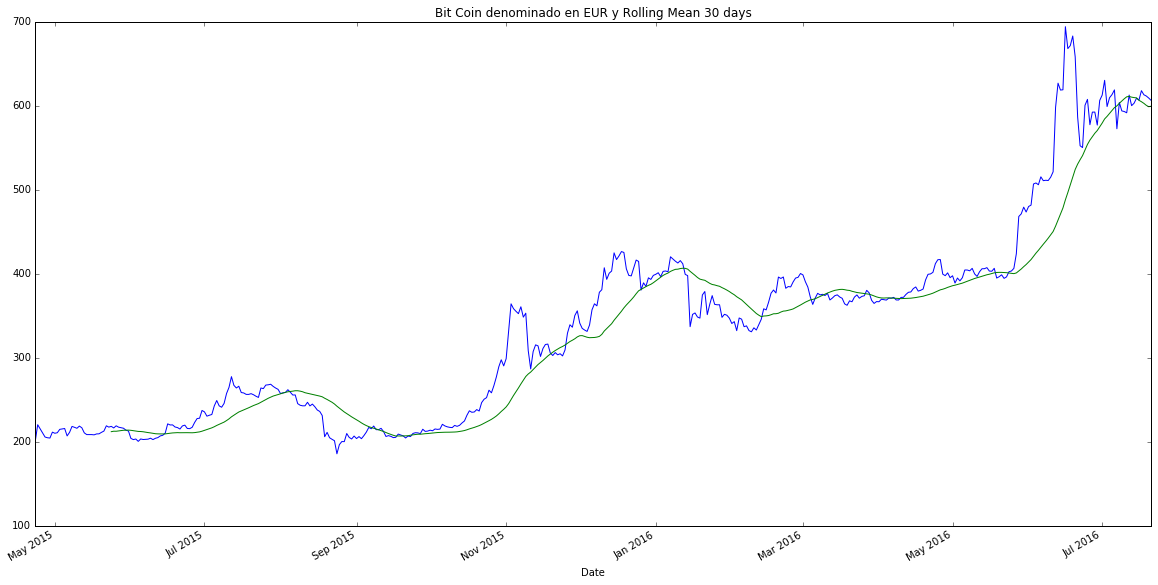

In [13]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title('Bit Coin denominado en EUR y Rolling Mean 30 days')
EUR15.PriceEUR.plot(label="Bit Coin EUR")
EUR15RM.plot(label="Bit Coin EUR RM")  
plt.show()

In [14]:
CAN15RM=Series.rolling(CAN15.PriceCAN, min_periods=30, window=30).mean()
CAN15RM=CAN15RM.dropna()
CAN15RM.head()

Date
2015-09-29    309.196000
2015-09-30    309.616333
2015-10-01    310.241667
2015-10-02    310.712333
2015-10-03    311.305000
Name: PriceCAN, dtype: float64

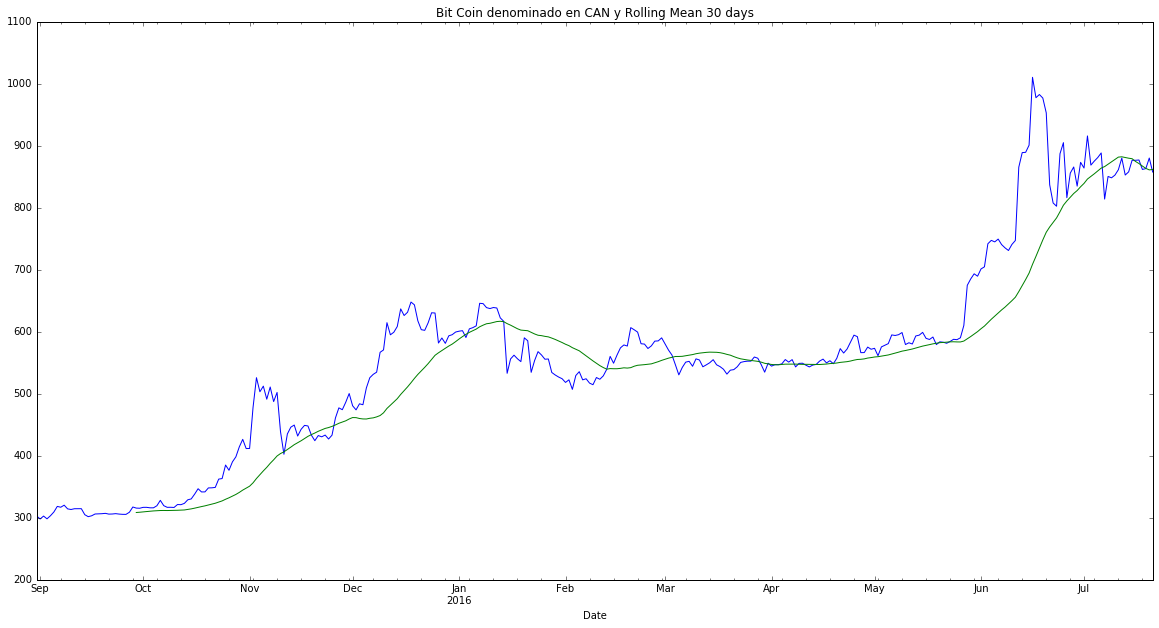

In [15]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title('Bit Coin denominado en CAN y Rolling Mean 30 days')
CAN15.PriceCAN.plot(label="Bit Coin CAN")
CAN15RM.plot(label="Bit Coin CAN RM")

plt.show()

In [16]:
GBP15RM=Series.rolling(GBP15.PriceGBP, min_periods=30, window=30,center=False).mean()
GBP15RM=GBP15RM.dropna()
GBP15RM.head()

Date
2015-05-22    155.656667
2015-05-23    155.513000
2015-05-24    154.546333
2015-05-25    153.517333
2015-05-26    153.560333
Name: PriceGBP, dtype: float64

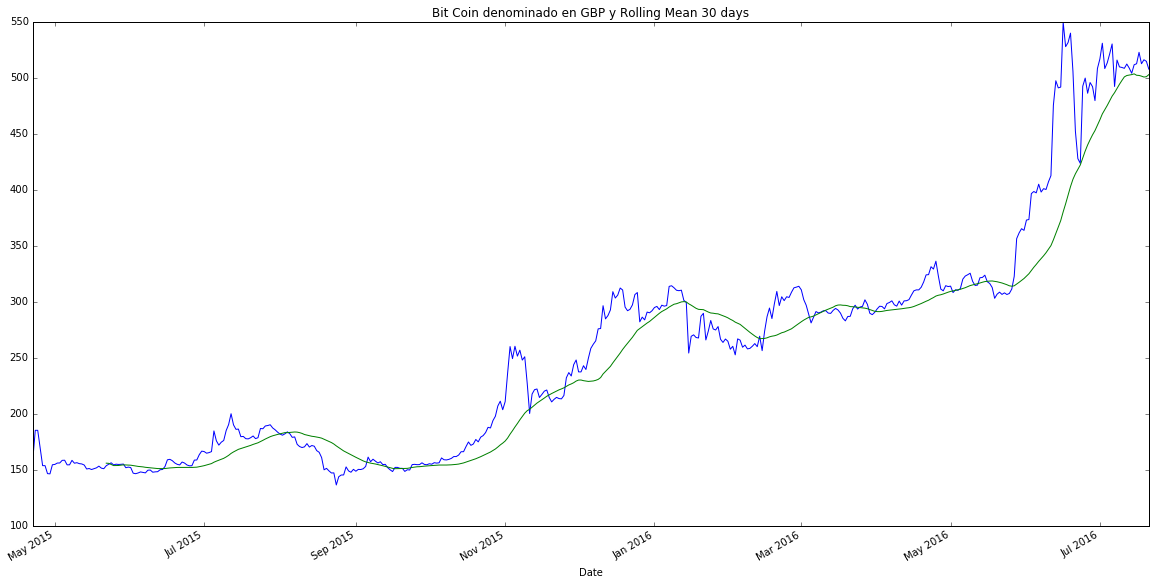

In [17]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title('Bit Coin denominado en GBP y Rolling Mean 30 days')
GBP15.PriceGBP.plot(label="Bit Coin GBP")
GBP15RM.plot(label="Bit Coin GBP y RM")

plt.show()

El problema de las medias móviles es que funcionan bien en situaciones de tendencia, pero no de lateralidad.
Sería más ventajoso trabajar con varias medias móviles de forma simultánea y con otras medidas. Entiendo que esto va más allá de lo solicitado en el ejercicio, por lo que no pocederé a realizar este análisis.

# Concatenación de Dataframes

In [18]:
del CAN15['AmountCAN']
del EUR15['AmountEUR']
del GBP15['AmountGBP']

In [19]:
two_coins=CAN15.merge(EUR15, how='inner', left_index=True, right_index=True).sort_index()
two_coins=two_coins.dropna()
print(two_coins.shape)

(326, 2)


In [20]:
three_coins=two_coins.merge(GBP15, how='inner', left_index=True, right_index=True).sort_index()
three_coins=three_coins.dropna()
print(three_coins.shape)
three_coins.head()

(326, 3)


,PriceCAN,PriceEUR,PriceGBP
Date,,,
2015-08-31,303.46,206.50,150.16
2015-09-01,298.74,203.51,148.47
2015-09-02,303.42,205.85,150.12
2015-09-03,298.97,203.37,149.99
2015-09-04,303.93,207.02,150.67


# Obtención del máximo spread entre cada uno de los tres mercados 

Se expresa el spread en términos absolutos.

In [21]:
three_coins['pEUR_GBP']=abs(three_coins.PriceEUR - three_coins.PriceGBP)
three_coins['pEUR_CAN']=abs(three_coins.PriceEUR - three_coins.PriceCAN)
three_coins['pCAN_GBP']=abs(three_coins.PriceCAN - three_coins.PriceGBP)
three_coins.head()

,PriceCAN,PriceEUR,PriceGBP,pEUR_GBP,pEUR_CAN,pCAN_GBP
Date,,,,,,
2015-08-31,303.46,206.50,150.16,56.34,96.96,153.30
2015-09-01,298.74,203.51,148.47,55.04,95.23,150.27
2015-09-02,303.42,205.85,150.12,55.73,97.57,153.30
2015-09-03,298.97,203.37,149.99,53.38,95.60,148.98
2015-09-04,303.93,207.02,150.67,56.35,96.91,153.26


In [22]:
print "El máximo spread entre bitcoin denominado en EUR y GBP fue de", three_coins.pEUR_GBP.max(), "registrado el día", three_coins.pEUR_GBP.argmax()
print "El máximo spread entre bitcoin denominado en EUR y CAN fue de", three_coins.pEUR_CAN.max(), "registrado el día", three_coins.pEUR_CAN.argmax()
print "El máximo spread entre bitcoin denominado en GBP y CAN fue de", three_coins.pCAN_GBP.max(), "registrado el día", three_coins.pCAN_GBP.argmax()

El máximo spread entre bitcoin denominado en EUR y GBP fue de 152.61 registrado el día 2016-06-20 00:00:00
El máximo spread entre bitcoin denominado en EUR y CAN fue de 317.25 registrado el día 2016-06-16 00:00:00
El máximo spread entre bitcoin denominado en GBP y CAN fue de 461.65 registrado el día 2016-06-16 00:00:00


In [23]:
print "El mínimo spread entre bitcoin denominado en EUR y GBP fue de", three_coins.pEUR_GBP.min(), "registrado el día", three_coins.pEUR_GBP.argmin()
print "El mínimo spread entre bitcoin denominado en EUR y CAN fue de", three_coins.pEUR_CAN.min(), "registrado el día", three_coins.pEUR_CAN.argmin()
print "El mínimo spread entre bitcoin denominado en GBP y CAN fue de", three_coins.pCAN_GBP.min(), "registrado el día", three_coins.pCAN_GBP.argmin()

El mínimo spread entre bitcoin denominado en EUR y GBP fue de 51.38 registrado el día 2015-09-13 00:00:00
El mínimo spread entre bitcoin denominado en EUR y CAN fue de 95.23 registrado el día 2015-09-01 00:00:00
El mínimo spread entre bitcoin denominado en GBP y CAN fue de 148.98 registrado el día 2015-09-03 00:00:00


# Obtención del spread medio para todo el periodo entre los tres mercados

Continúo trabajando con spreads en términos absolutos.

In [24]:
print "El spread medio entre bitcoin denominado en EUR y GBP fue de", three_coins.pEUR_GBP.mean()
print "El spread medio entre bitcoin denominado en EUR y CAN fue de", three_coins.pEUR_CAN.mean()
print "El spread medio entre bitcoin denominado en GBP y CAN fue de", three_coins.pCAN_GBP.mean()

El spread medio entre bitcoin denominado en EUR y GBP fue de 86.4995705521
El spread medio entre bitcoin denominado en EUR y CAN fue de 179.188773006
El spread medio entre bitcoin denominado en GBP y CAN fue de 265.688343558


# Creación de gráficos que los comparen dos a dos, y que muestren con alguna indicación gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”. 
Pista: puedes obtener un subconjunto del dataframe solo con estos días y dibujarlo como si fuese otra serie diferente.
Continúo trabajando con el spread en términos absolutos.

Seleccionaré como valores de spread altos (máximos), aquellos que  estén por encima del promedio más dos desviaciones típicas.

In [25]:
limpEUR_GBP=three_coins.pEUR_GBP.mean()+2*three_coins.pEUR_GBP.std()
limpEUR_GBP

124.02378690370465

In [26]:
limpEUR_CAN=three_coins.pEUR_CAN.mean()+2*three_coins.pEUR_CAN.std()
limpEUR_CAN

280.83274624662397

In [27]:
limpCAN_GBP=three_coins.pCAN_GBP.mean()+2*three_coins.pCAN_GBP.std()
limpCAN_GBP

397.74234442415263

In [28]:
spreadmax_EURGBP=three_coins.loc[three_coins['pEUR_GBP'] >=limpEUR_GBP]

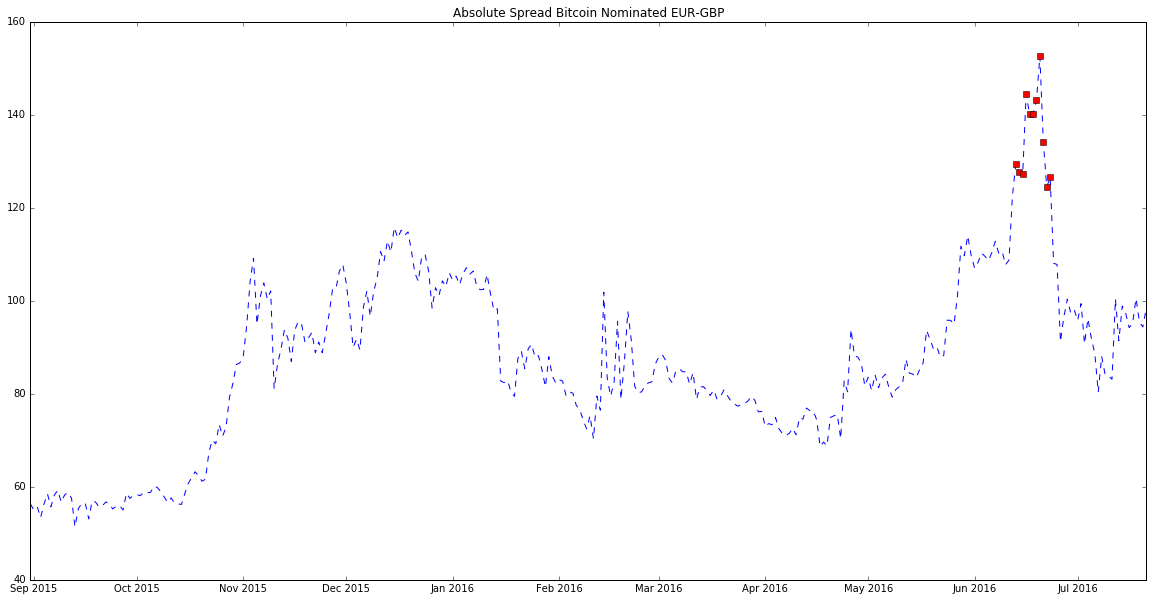

In [29]:
%matplotlib inline
plt.figure(figsize=(20,10))

line1=plt.plot(three_coins.pEUR_GBP, '--')
plt.setp(line1, color="b")
line2=plt.plot(spreadmax_EURGBP.pEUR_GBP, 's')
plt.setp(line2,color="r",)
plt.title("Absolute Spread Bitcoin Nominated EUR-GBP")


plt.show()

In [30]:
spreadmax_EURCAN=three_coins.loc[three_coins['pEUR_CAN'] >=limpEUR_CAN]

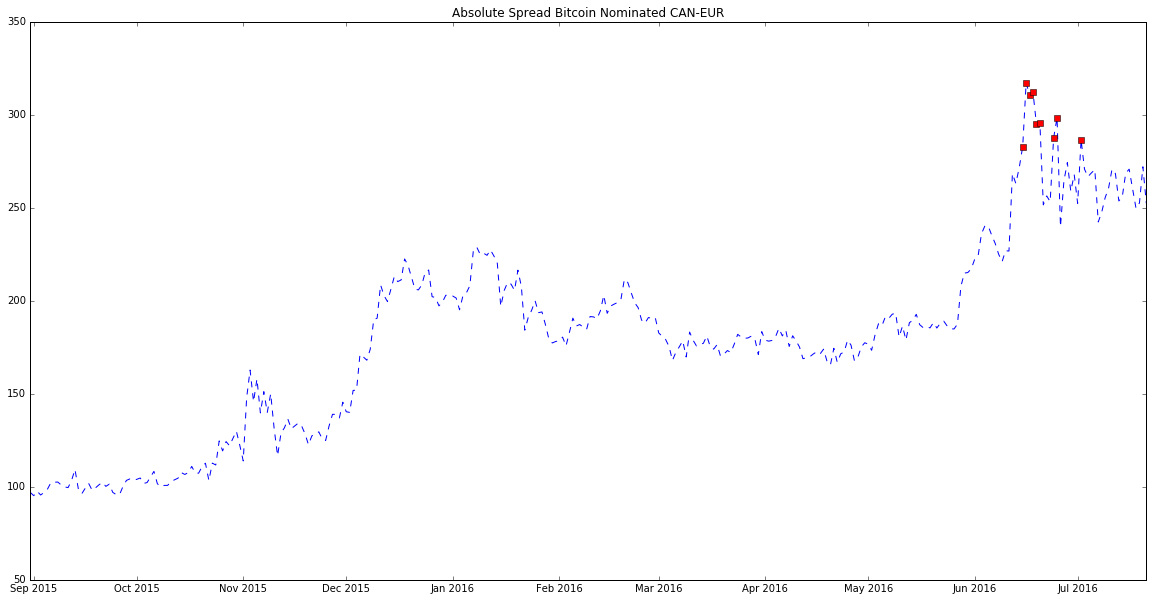

In [31]:
%matplotlib inline
plt.figure(figsize=(20,10))

line1=plt.plot(three_coins.pEUR_CAN, '--')
plt.setp(line1, color="b")
line2=plt.plot(spreadmax_EURCAN.pEUR_CAN, 's')
plt.setp(line2,color="r",)
plt.title("Absolute Spread Bitcoin Nominated CAN-EUR")


plt.show()

In [32]:
spreadmax_CANGBP=three_coins.loc[three_coins['pCAN_GBP'] >=limpCAN_GBP]

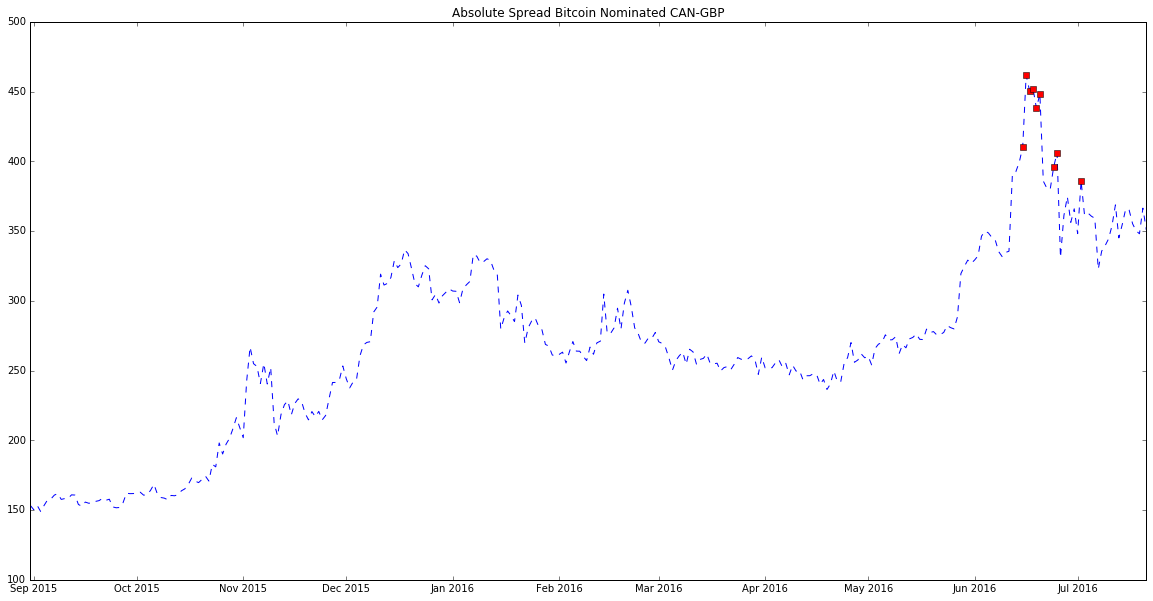

In [33]:
%matplotlib inline
plt.figure(figsize=(20,10))

line1=plt.plot(three_coins.pCAN_GBP, '--')
plt.setp(line1, color="b")
line2=plt.plot(spreadmax_EURCAN.pCAN_GBP, 's')
plt.setp(line2,color="r",)
plt.title("Absolute Spread Bitcoin Nominated CAN-GBP")


plt.show()

Conclusión: Para invitar a cenar a **Brad Pitt** habría que haber jugado con las divisas según lo indicado por los gráficos. Para llegar a esta conclusión no hace falta la ayufda de nigún Premio Nobel experto en burbujas finacieras.